In [3]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

import tensorflow as tf
import numpy as np
print(tf.__version__)
tf.random.set_seed(20200819)

import os
from time import time

2.3.0


In [5]:
os.chdir('/content/gdrive/My Drive/AI/Dose prediction/')

In [32]:
Dose = pd.read_csv('Dose prediction_20200819.csv')

Dose.head()

,ID,age,sex,HTN,DM,TB,Hepatitis,OtherthyroidD,Op,biopsy,tumorsize,pT,pN,pM,cT,preadmissiondate,preTg,preATA,preTSH,dose,preparation,FUdate,FUscan,Furesult,Fubinary
0,16,29,1,0,0,0,0,0,TT,1,4.0,2,1b,0,2,2000-12-28,55.6,128.0,1.00,350,1,2002-01-16,1,Biochemical incomplete,0
1,19,26,2,0,0,0,0,0,TT RND,1,2.0,1b,1a,0,1b,2001-08-13,11.0,2.0,69.80,200,1,2002-03-06,1,Biochemical incomplete,0
2,20,54,2,0,0,0,0,0,TT,1,2.0,2,1a,0,4a,2001-09-03,29.0,2.0,61.20,300,1,2002-04-03,2,Structural incomplete,0
3,22,41,1,0,0,0,0,0,TT,1,1.5,3a,1a,0,3a,2001-10-08,16.0,2.0,59.89,150,1,2002-05-08,1,Biochemical incomplete,0
4,23,62,2,0,0,0,1,0,TT,1,3.0,2,1a,0,3b,2001-10-08,22.0,2.0,58.46,200,1,2002-08-07,1,Biochemical incomplete,0


In [33]:
# THW 환자만 대상
THW = Dose['preparation']==1
Dose_main = Dose[THW]

In [34]:
Dose_main.columns
Dose_main = Dose_main.drop(['ID', 'preadmissiondate', 'preparation', 'FUdate', 'FUscan', 'Furesult'], axis='columns')
#Dose_main.head
#Dose_main.describe()

Dose_main.pN[Dose_main.pN==' 1b'] = '1b'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
Dose_main.head()

,age,sex,HTN,DM,TB,Hepatitis,OtherthyroidD,Op,biopsy,tumorsize,pT,pN,pM,cT,preTg,preATA,preTSH,dose,Fubinary
0,29,1,0,0,0,0,0,TT,1,4.0,2,1b,0,2,55.6,128.0,1.00,350,0
1,26,2,0,0,0,0,0,TT RND,1,2.0,1b,1a,0,1b,11.0,2.0,69.80,200,0
2,54,2,0,0,0,0,0,TT,1,2.0,2,1a,0,4a,29.0,2.0,61.20,300,0
3,41,1,0,0,0,0,0,TT,1,1.5,3a,1a,0,3a,16.0,2.0,59.89,150,0
4,62,2,0,0,0,1,0,TT,1,3.0,2,1a,0,3b,22.0,2.0,58.46,200,0


In [48]:
Dose_main.Fubinary.value_counts()

0    327
1    304
Name: Fubinary, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


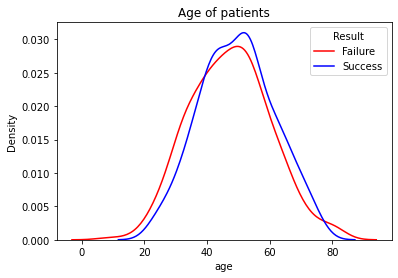

In [63]:
#(ax.set_title(), ax.set_xlabel(), ax.set_ylabel())

sns.distplot(Dose_main[Dose_main['Fubinary'] == 0]['age'], hist=False, color="red", label="Failure")
sns.distplot(Dose_main[Dose_main['Fubinary'] == 1]['age'], hist=False, color="blue", label="Success")
plt.title('Age of patients')
plt.legend(title="Result")
plt.show()

In [80]:
SEX = pd.DataFrame(Dose_main.sex.value_counts())

Index(['sex'], dtype='object')

In [88]:
SEX.index = 'Female', 'Male'
SEX

,sex
Female,518
Male,113


In [98]:
Dose_main[Dose_main['Fubinary'] == 1]['sex']

12     2
27     2
41     2
44     2
47     2
      ..
714    2
729    2
734    2
747    2
759    2
Name: sex, Length: 304, dtype: int64

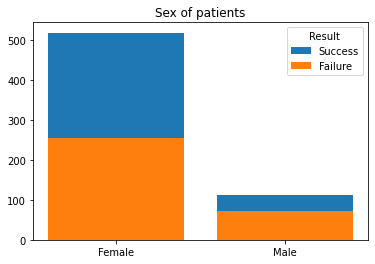

In [112]:
x = ['Female', 'Male']
y = Dose_main['sex'].value_counts()

a = ['Female', 'Male']
b = Dose_main[Dose_main['Fubinary'] == 0]['sex'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('Sex of patients')
plt.legend(title="Result")
plt.show()

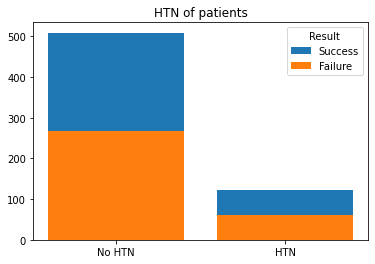

In [120]:
x = [0, 1]
y = Dose_main['HTN'].value_counts()

a = [0, 1]
b = Dose_main[Dose_main['Fubinary'] == 0]['HTN'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('HTN of patients')
plt.legend(title="Result")
plt.xticks([0,1],['No HTN', 'HTN'])
plt.show()

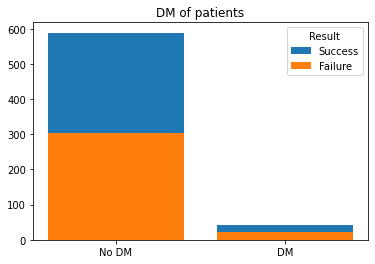

In [123]:
x = [0, 1]
y = Dose_main['DM'].value_counts()

a = [0, 1]
b = Dose_main[Dose_main['Fubinary'] == 0]['DM'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('DM of patients')
plt.legend(title="Result")
plt.xticks([0,1],['No DM', 'DM'])
plt.show()

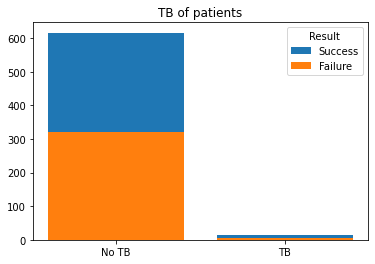

In [124]:
x = [0, 1]
y = Dose_main['TB'].value_counts()

a = [0, 1]
b = Dose_main[Dose_main['Fubinary'] == 0]['TB'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('TB of patients')
plt.legend(title="Result")
plt.xticks([0,1],['No TB', 'TB'])
plt.show()

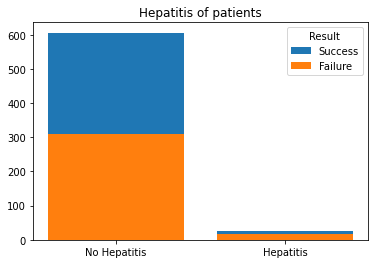

In [125]:
x = [0, 1]
y = Dose_main['Hepatitis'].value_counts()

a = [0, 1]
b = Dose_main[Dose_main['Fubinary'] == 0]['Hepatitis'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('Hepatitis of patients')
plt.legend(title="Result")
plt.xticks([0,1],['No Hepatitis', 'Hepatitis'])
plt.show()

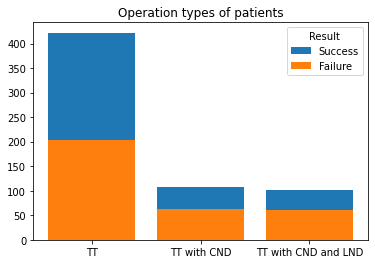

In [128]:
x = [0, 1, 2]
y = Dose_main['Op'].value_counts()

a = [0, 1, 2]
b = Dose_main[Dose_main['Fubinary'] == 0]['Op'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('Operation types of patients')
plt.legend(title="Result")
plt.xticks([0,1,2],['TT', 'TT with CND', 'TT with CND and LND'])
plt.show()

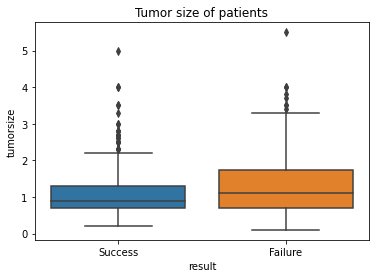

In [150]:
# x = [0, 1, 2]
# y = Dose_main['Op'].value_counts()

# a = [0, 1, 2]
# b = Dose_main[Dose_main['Fubinary'] == 0]['Op'].value_counts()
sns.boxplot(x=(1-Dose_main['Fubinary']), y=Dose_main['tumorsize'])

# plt.boxplot(x, y, label='Success')
# plt.bar(a, b, label='Failure')

plt.title('Tumor size of patients')
# plt.legend(title="Result")
plt.xticks([0,1],['Success', 'Failure'])
plt.xlabel('result')
plt.show()

In [158]:
Dose_main.pT.value_counts()

1a    341
1b    209
2      67
3a     11
4a      3
Name: pT, dtype: int64

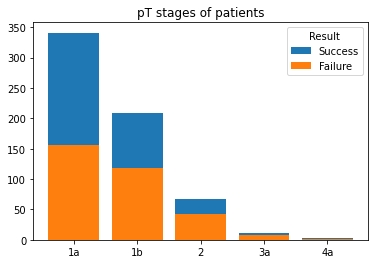

In [140]:
x = ['1a', '1b', '2', '3a', '4a']
y = Dose_main['pT'].value_counts()

a = ['1a', '1b', '2', '3a', '4a']
b = Dose_main[Dose_main['Fubinary'] == 0]['pT'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('pT stages of patients')
plt.legend(title="Result")
#plt.xticks([0,1,2],['TT', 'TT with CND', 'TT with CND and LND'])
plt.show()

In [159]:
Dose_main.cT.value_counts()

1a    283
1b    136
3b    102
4a     56
2      46
3a      8
Name: cT, dtype: int64

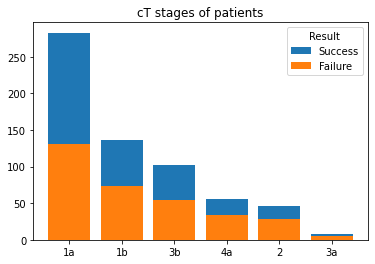

In [160]:
x = ['1a', '1b', '3b', '4a', '2', '3a']
y = Dose_main['cT'].value_counts()

a = ['1a', '1b', '3b', '4a', '2', '3a']
b = Dose_main[Dose_main['Fubinary'] == 0]['cT'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('cT stages of patients')
plt.legend(title="Result")
#plt.xticks([0,1,2],['TT', 'TT with CND', 'TT with CND and LND'])
plt.show()

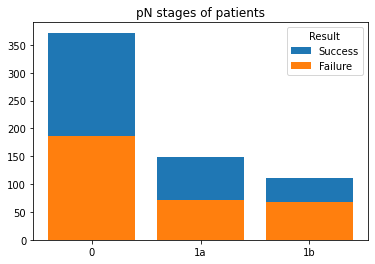

In [145]:
x = ['0', '1a', '1b']
y = Dose_main['pN'].value_counts()

a = ['0', '1a', '1b']
b = Dose_main[Dose_main['Fubinary'] == 0]['pN'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('pN stages of patients')
plt.legend(title="Result")
#plt.xticks([0,1,2],['TT', 'TT with CND', 'TT with CND and LND'])
plt.show()

In [146]:
Dose_main.pM.value_counts()

0    623
1      8
Name: pM, dtype: int64

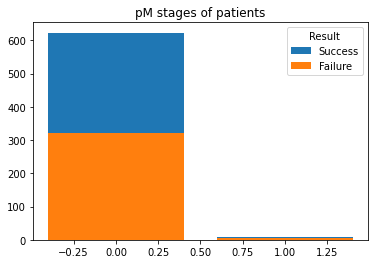

In [147]:
x = [0, 1]
y = Dose_main['pM'].value_counts()

a = [0, 1]
b = Dose_main[Dose_main['Fubinary'] == 0]['pM'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('pM stages of patients')
plt.legend(title="Result")
#plt.xticks([0,1,2],['TT', 'TT with CND', 'TT with CND and LND'])
plt.show()

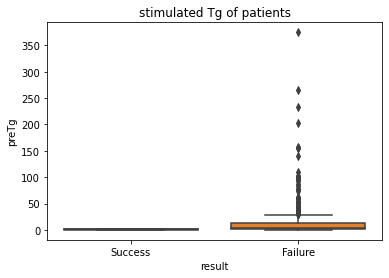

In [149]:
# x = [0, 1, 2]
# y = Dose_main['Op'].value_counts()

# a = [0, 1, 2]
# b = Dose_main[Dose_main['Fubinary'] == 0]['Op'].value_counts()
sns.boxplot(x=(1-Dose_main['Fubinary']), y=Dose_main['preTg'])

# plt.boxplot(x, y, label='Success')
# plt.bar(a, b, label='Failure')

plt.title('stimulated Tg of patients')
# plt.legend(title="Result")
plt.xticks([0,1],['Success', 'Failure'])
plt.xlabel('result')
plt.show()

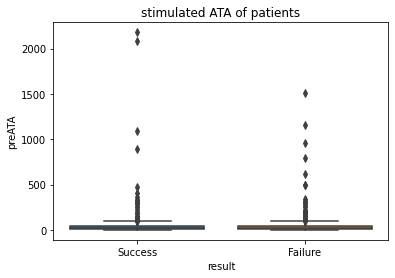

In [151]:
# x = [0, 1, 2]
# y = Dose_main['Op'].value_counts()

# a = [0, 1, 2]
# b = Dose_main[Dose_main['Fubinary'] == 0]['Op'].value_counts()
sns.boxplot(x=(1-Dose_main['Fubinary']), y=Dose_main['preATA'])

# plt.boxplot(x, y, label='Success')
# plt.bar(a, b, label='Failure')

plt.title('stimulated ATA of patients')
# plt.legend(title="Result")
plt.xticks([0,1],['Success', 'Failure'])
plt.xlabel('result')
plt.show()

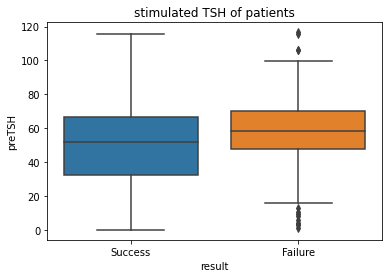

In [152]:
# x = [0, 1, 2]
# y = Dose_main['Op'].value_counts()

# a = [0, 1, 2]
# b = Dose_main[Dose_main['Fubinary'] == 0]['Op'].value_counts()
sns.boxplot(x=(1-Dose_main['Fubinary']), y=Dose_main['preTSH'])

# plt.boxplot(x, y, label='Success')
# plt.bar(a, b, label='Failure')

plt.title('stimulated TSH of patients')
# plt.legend(title="Result")
plt.xticks([0,1],['Success', 'Failure'])
plt.xlabel('result')
plt.show()

In [154]:
Dose_main.dose.value_counts()

150    271
100    237
80      75
180     26
50      15
200      3
300      2
350      1
30       1
Name: dose, dtype: int64

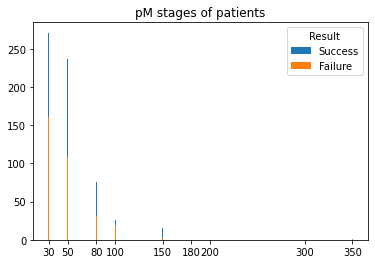

In [156]:
x = [30, 50, 80, 100, 150, 180, 200, 300, 350]
y = Dose_main['dose'].value_counts()

a = [30, 50, 80, 100, 150, 180, 200, 300, 350]
b = Dose_main[Dose_main['Fubinary'] == 0]['dose'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('pM stages of patients')
plt.legend(title="Result")
plt.xticks([30, 50, 80, 100, 150, 180, 200, 300, 350])
plt.show()

In [163]:
Dose_main.columns

Index(['age', 'sex', 'HTN', 'DM', 'TB', 'Hepatitis', 'OtherthyroidD', 'Op',
       'biopsy', 'tumorsize', 'pT', 'pN', 'pM', 'cT', 'preTg', 'preATA',
       'preTSH', 'dose', 'Fubinary'],
      dtype='object')

In [161]:
Dose_main.I123.value_counts()

AttributeError: ignored

In [ ]:
# x = [0, 1, 2]
# y = Dose_main['Op'].value_counts()

# a = [0, 1, 2]
# b = Dose_main[Dose_main['Fubinary'] == 0]['Op'].value_counts()
sns.boxplot(x=(1-Dose_main['Fubinary']), y=Dose_main['tumorsize'])

# plt.boxplot(x, y, label='Success')
# plt.bar(a, b, label='Failure')

plt.title('Tumor size of patients')
# plt.legend(title="Result")
plt.xticks([0,1],['Success', 'Failure'])
plt.show()

In [137]:
Dose_main.columns

Index(['age', 'sex', 'HTN', 'DM', 'TB', 'Hepatitis', 'OtherthyroidD', 'Op',
       'biopsy', 'tumorsize', 'pT', 'pN', 'pM', 'cT', 'preTg', 'preATA',
       'preTSH', 'dose', 'Fubinary'],
      dtype='object')

In [ ]:
x = [0, 1]
y = Dose_main['OtherthyroidD'].value_counts()

a = [0, 1]
b = Dose_main[Dose_main['Fubinary'] == 0]['OtherthyroidD'].value_counts()
plt.bar(x, y, label='Success')
plt.bar(a, b, label='Failure')

plt.title('Other thyroid disease of patients')
plt.legend(title="Result")
plt.xticks([0,1],['No Other thyroid disease', 'Other thyroid disease'])
plt.show()

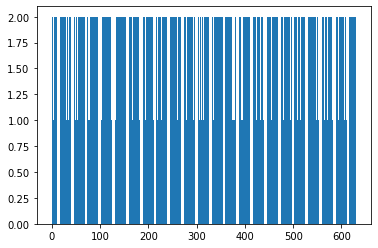

In [24]:
plt.bar(range(len(Dose_main.sex)),Dose_main.sex)
plt.show()

In [ ]:
THW = Dose['preparation']==1
Dose_main = Dose[THW]

Dose_main.columns
Dose_main = Dose_main.drop(['ID', 'preadmissiondate', 'preparation', 'FUdate', 'FUscan', 'Furesult'], axis='columns')
#Dose_main.head
#Dose_main.describe()

Dose_main.pN[Dose_main.pN==' 1b'] = '1b'

# DATA Explore
'''

plt.hist(Dose_main.biopsy, bins=2) # have to consider remove follicular type, because it is too small.
plt.show()
plt.hist(Dose_main.tumorsize) # Consider to apply log scale, because it shows right skewness
plt.show()
plt.hist(Dose_main.pT)
plt.show()
plt.hist(Dose_main.pN)
plt.show()
plt.hist(Dose_main.pM)
plt.show()
plt.hist(Dose_main.preTg) # have to apply log scale, because almost of preTg <10 
plt.show()
plt.hist(Dose_main.preATA) # have to apply log scale, because it has right skewness
plt.show()
plt.hist(Dose_main.preTSH)  
plt.show()
plt.hist(Dose_main.dose) 
plt.show()
plt.hist(Dose_main.preparation) 
plt.show()
plt.hist(Dose_main.Fubinary) 
plt.show()
'''
# DATA adjustment
#Dose_main.columns

# age MinMax scaling
Dose_main['age_MM'] = (Dose_main['age'] - min(Dose_main['age']))/(max(Dose_main['age']) - min(Dose_main['age']))

# Sex Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.sex)], axis=1)
Dose_main.rename(columns={1:'Male'}, inplace=True)
Dose_main.rename(columns={2:'Female'}, inplace=True)

# HTN Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.HTN)], axis=1)
Dose_main.rename(columns={0:'NoHTN'}, inplace=True)
Dose_main.rename(columns={1:'HTN'}, inplace=True)

# DM Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.DM)], axis=1)
Dose_main.rename(columns={0:'NoDM'}, inplace=True)
Dose_main.rename(columns={1:'DM'}, inplace=True)

# TB Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.TB)], axis=1)
Dose_main.rename(columns={0:'NoTB'}, inplace=True)
Dose_main.rename(columns={1:'TB'}, inplace=True)

# Hepatitis Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.Hepatitis)], axis=1)
Dose_main.rename(columns={0:'NoHepatitis'}, inplace=True)
Dose_main.rename(columns={1:'Hepatitis'}, inplace=True)

# OtherthyroidD Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.OtherthyroidD)], axis=1)
Dose_main.rename(columns={0:'NoOtherthyroidD'}, inplace=True)
Dose_main.rename(columns={1:'OtherthyroidD'}, inplace=True)

# Op Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.Op)], axis=1)

'''
# Biopsy Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.biopsy)], axis=1)
Dose_main.rename(columns={1:'Papillary'}, inplace=True)
Dose_main.rename(columns={2:'Follicular'}, inplace=True)
'''

# Tumorsize MinMax scaling
Dose_main['tumorsize_MM'] = (np.log(Dose_main['tumorsize']) - min(np.log(Dose_main['tumorsize'])))/(max(np.log(Dose_main['tumorsize'])) - min(np.log(Dose_main['tumorsize'])))

# pT Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.pT)], axis=1)
Dose_main.rename(columns={'1a':'pT1a'}, inplace=True)
Dose_main.rename(columns={'1b':'pT1b'}, inplace=True)
Dose_main.rename(columns={'2':'pT2'}, inplace=True)
Dose_main.rename(columns={'3a':'pT3a'}, inplace=True)
Dose_main.rename(columns={'4a':'pT4a'}, inplace=True)

# pN Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.pN)], axis=1)
Dose_main.rename(columns={'0':'N0'}, inplace=True)
Dose_main.rename(columns={'1a':'N1a'}, inplace=True)
Dose_main.rename(columns={'1b':'N1b'}, inplace=True)
Dose_main.rename(columns={' 1b':'N1b'}, inplace=True)

# pM Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.pM)], axis=1)
Dose_main.rename(columns={0:'M0'}, inplace=True)
Dose_main.rename(columns={1:'M1'}, inplace=True)

# cT Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.cT)], axis=1)
Dose_main.rename(columns={'1a':'cT1a'}, inplace=True)
Dose_main.rename(columns={'1b':'cT1b'}, inplace=True)
Dose_main.rename(columns={'2':'cT2'}, inplace=True)
Dose_main.rename(columns={'3a':'cT3a'}, inplace=True)
Dose_main.rename(columns={'3b':'cT3b'}, inplace=True)
Dose_main.rename(columns={'4a':'cT4a'}, inplace=True)


# preTg MinMax scaling
Dose_main['preTg_MM'] = (np.log(Dose_main['preTg']) - min(np.log(Dose_main['preTg'])))/(max(np.log(Dose_main['preTg'])) - min(np.log(Dose_main['preTg'])))

# preATA MinMax scaling
Dose_main['preATA_MM'] = (np.log(Dose_main['preATA']) - min(np.log(Dose_main['preATA'])))/(max(np.log(Dose_main['preATA']) )- min(np.log(Dose_main['preATA'])))

# preTSH MinMax scaling
Dose_main['preTSH_MM'] = (Dose_main['preTSH'] - min(Dose_main['preTSH']))/(max(Dose_main['preTSH']) - min(Dose_main['preTSH']))

'''
# preparation Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.preparation)], axis=1)
Dose_main.rename(columns={1:'THW'}, inplace=True)
Dose_main.rename(columns={2:'rhTSH'}, inplace=True)
'''

# Fubinary Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.Fubinary)], axis=1)
Dose_main.rename(columns={0:'AblationSuccess'}, inplace=True)
Dose_main.rename(columns={1:'AblationFailure'}, inplace=True)

'''
# dose Onehot encoding
Dose_main = pd.concat([Dose_main, pd.get_dummies(Dose_main.dose)], axis=1)
Dose_main.rename(columns={30:'30'}, inplace=True)
Dose_main.rename(columns={50:'50'}, inplace=True)
Dose_main.rename(columns={80:'80'}, inplace=True)
Dose_main.rename(columns={100:'100'}, inplace=True)
Dose_main.rename(columns={150:'150'}, inplace=True)
Dose_main.rename(columns={180:'180'}, inplace=True)
Dose_main.rename(columns={200:'200'}, inplace=True)
'''


# Delete original columns
Dose_main = Dose_main.drop(['age', 'sex', 'HTN', 'DM', 'TB', 'Hepatitis', 'OtherthyroidD', 'Op', 'biopsy', 'tumorsize', 'pT', 'pN', 'pM', 'cT', 'preTg', 'preATA', 'preTSH', 'Fubinary'], axis='columns')

#Dose_main.describe()
#Dose_main.columns

Dose_main_X = Dose_main[['dose', 'age_MM', 'Male', 'Female', 'NoHTN', 'NoDM', 'NoTB',
       'NoHepatitis', 'NoOtherthyroidD', 'TT', 'TT CND', 'TT RND',
       'tumorsize_MM', 'pT1a', 'pT1b', 'pT2', 'pT3a', 'pT4a', 'N0', 'N1a',
       'N1b', 'M0', 'M1', 'cT1a', 'cT1b', 'cT2', 'cT3a', 'cT3b', 'cT4a',
       'preTg_MM', 'preATA_MM', 'preTSH_MM',]]

Dose_main_Y = Dose_main[['AblationSuccess',
                         'AblationFailure']]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(Dose_main_X, Dose_main_Y, test_size= 0.2, shuffle=True, random_state=20200819)
X_train = np.asarray(X_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.float32)

from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy

# Create model
def create_model():
    model = Sequential()
    #model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.25))
    #model.add(Dense(16, activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(8, activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 20200819
numpy.random.seed(seed)

# 모델 실행
model=create_model()
model.fit(X_train, y_train, epochs=1000, batch_size=X_train.shape[0])
#model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
#kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#results = cross_val_score(model, X_train, y_train, cv=kfold)

model.evaluate(X_test, y_test)
print(model.metrics_names)

yhat = model.predict(X_test)[:,1]
for idx in range(len(yhat)):
    if yhat[idx] >= 0.5:
        yhat[idx] = 1
    else:
        yhat[idx] = 0 

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[:,1], yhat)